<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Jupyter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Dynamic systems: 4. Heat
## Seasonal variation of surface temperature
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

In this notebook, we use a periodic conditions to simulate the **seasonal variation**
of surface temperatures, and the **penetration** of this temporal variation into
the sub-surface.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

----
## Define seasonal variation

$$
T(t) = T_0 + \Delta T \cos(\omega t)
$$
with
- $T_0$ [C] annually-averaged temperature
- $\Delta T$ [C] yearly temperature variation
- $t$ [s] time
- $\omega=\frac{2\pi}{P}$ [1/s] frequency
- $P$ [s] period

In [2]:
# define parameter
T0       = 10.
dT       = -20.
year2sec = 365.*24.*3600.
period   = 1.*year2sec
omega    = 2*np.pi/period

# define arrays for monthly data
time = np.zeros(12)
T    = np.zeros(12)

# loop over months
for i in range(12):
    time[i] = (float(i)+1.)/12. * year2sec
    T[i]    = T0 + dT*np.cos(omega*(time[i]-0.5/12.*year2sec))

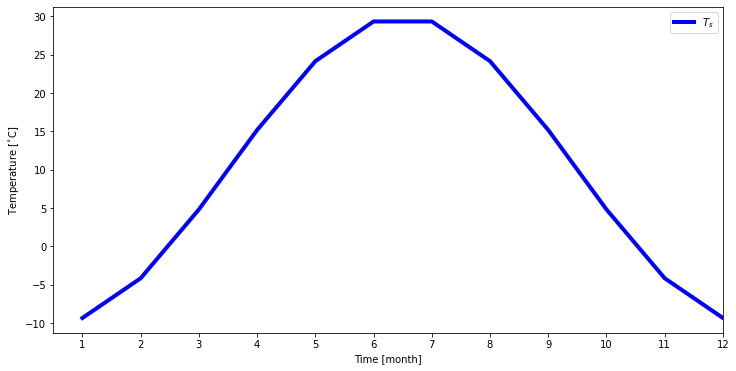

In [3]:
plt.figure(figsize=(12,6))
plt.xlim(0.5,11.5)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.xlabel('Time [month]')
plt.ylabel('Temperature [$^{\circ}$C]')
plt.plot(12*time/year2sec,T,linewidth=4,color='blue',label='$T_s$')
plt.legend()

----
## Calculate depth-dependent temperatures

$$
T(z,t) = T_0 + \Delta T e^{-\frac{\displaystyle z}{\displaystyle L}}\cos(\omega t - \frac{z}{L})
$$
with
- $T_0$ [C] annually-averaged temperature
- $\Delta T$ [C] yearly temperature variation
- $t$ [s] time
- $z$ [s] depth
- $L$ [m] peneration depth
- $\omega=\frac{2\pi}{P}$ [1/s] frequency
- $P$ [s] period

The penetration depth is defined as:
$$
L = \sqrt{\frac{2 \kappa}{\omega}}
$$
with
- $\kappa$ [m$^2$/s] thermal diffusivity

In [4]:
# define parameter
kappa = 1e-6
L     = np.sqrt(2.*kappa/omega)
print('Penetration length L [m]: ',round(L,2))

# define arrays for months data and depth
Tdepth = np.zeros(12*21).reshape(12,21)
depth  = np.zeros(21)

# loop over time and depth
for i in range(12):
    time[i] = (float(i)+1.)/12. * year2sec
    for j in range(21):
        depth[j]    = float(j)
        Tdepth[i,j] = T0 + dT*np.exp(-depth[j]/L)*np.cos(omega*(time[i]-0.5/12.*year2sec)-depth[j]/L)

Penetration length L [m]:  3.17


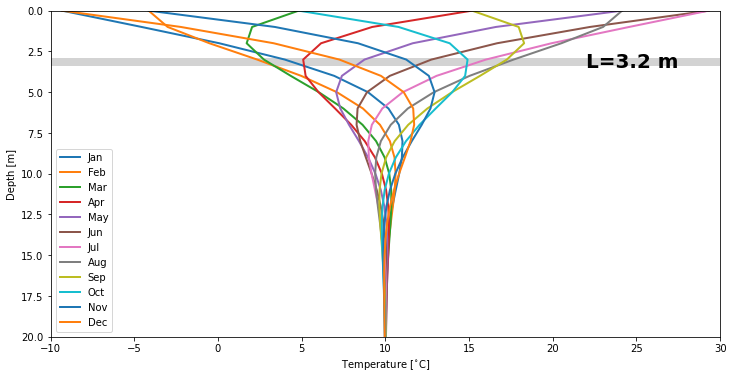

In [5]:
plt.figure(figsize=(12,6))
plt.xlim(-10,30)
plt.ylim(20,0)
plt.xlabel('Temperature [$^{\circ}$C]')
plt.ylabel('Depth [m]')
plt.plot([-10,30],[L,L],linewidth=8,color='lightgray')
plt.text(22.,L,'L='+str(round(L,1))+' m',fontsize=20,fontweight='bold',verticalalignment='center')
plt.plot(Tdepth[0,:],depth,lw=2,label='Jan')
plt.plot(Tdepth[1,:],depth,lw=2,label='Feb')
plt.plot(Tdepth[2,:],depth,lw=2,label='Mar')
plt.plot(Tdepth[3,:],depth,lw=2,label='Apr')
plt.plot(Tdepth[4,:],depth,lw=2,label='May')
plt.plot(Tdepth[5,:],depth,lw=2,label='Jun')
plt.plot(Tdepth[6,:],depth,lw=2,label='Jul')
plt.plot(Tdepth[7,:],depth,lw=2,label='Aug')
plt.plot(Tdepth[8,:],depth,lw=2,label='Sep')
plt.plot(Tdepth[9,:],depth,lw=2,label='Oct')
plt.plot(Tdepth[10,:],depth,lw=2,label='Nov')
plt.plot(Tdepth[11,:],depth,lw=2,label='Dec')
plt.legend()

... done